# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data


In [1120]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1122]:
bike = pd.read_csv(r"C:\Users\manug\Downloads\day.csv")

In [1123]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1124]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1125]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1126]:
# Check the shape of df

print(bike.shape)

(730, 16)


## Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [1130]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [1131]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

## Finding
There are no missing / Null values either in columns or rows

## Duplicate Check

In [1134]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [1135]:
bike_dup.shape

(730, 16)

In [1136]:
bike.shape

(730, 16)

### Insights 

The shape after running the drop duplicate command is same as the original dataframe. 

Hence we can conclude that there were zero duplicate values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [1139]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [1140]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Insights 
There seems to be no Junk/Unknown values in the entire dataset.

# Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [1144]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1145]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [1146]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [1149]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1150]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')


In [1151]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [1152]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [1153]:
# Convert 'bool' columns to 'uint8'
bike_new = bike_new.astype({col: 'uint8' for col in bike_new.select_dtypes(include=['bool']).columns})

# You don't need to explicitly convert the index to Int64Index
# Just printing the DataFrame info should show the correct types
bike_new.info()

# If you need to subset the DataFrame to have exactly 510 entries, you can do so with:
bike_new = bike_new.head(510)  # Or use your specific slicing method if needed

# Display again after slicing (if applied)
bike_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [1155]:
# Check the shape before spliting

bike_new.shape

(510, 30)

In [1156]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    

In [1157]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [1159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 183 to 492
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            357 non-null    int64  
 1   holiday       357 non-null    int64  
 2   workingday    357 non-null    int64  
 3   temp          357 non-null    float64
 4   atemp         357 non-null    float64
 5   hum           357 non-null    float64
 6   windspeed     357 non-null    float64
 7   cnt           357 non-null    int64  
 8   season_2      357 non-null    uint8  
 9   season_3      357 non-null    uint8  
 10  season_4      357 non-null    uint8  
 11  mnth_2        357 non-null    uint8  
 12  mnth_3        357 non-null    uint8  
 13  mnth_4        357 non-null    uint8  
 14  mnth_5        357 non-null    uint8  
 15  mnth_6        357 non-null    uint8  
 16  mnth_7        357 non-null    uint8  
 17  mnth_8        357 non-null    uint8  
 18  mnth_9        357 non-null    uin

In [1160]:
df_train.head(4)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
183,0,0,0,29.383347,33.42875,68.2500,15.333486,4649,0,1,...,0,0,0,0,0,0,0,0,1,0
397,1,0,1,16.365847,19.94855,67.2917,12.541529,3761,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,1,14.008347,17.80250,76.9583,4.917519,4075,0,0,...,0,0,0,0,0,1,0,0,1,0
394,1,0,1,11.035847,13.13125,40.0833,14.458064,3624,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1161]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 454 to 205
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            153 non-null    int64  
 1   holiday       153 non-null    int64  
 2   workingday    153 non-null    int64  
 3   temp          153 non-null    float64
 4   atemp         153 non-null    float64
 5   hum           153 non-null    float64
 6   windspeed     153 non-null    float64
 7   cnt           153 non-null    int64  
 8   season_2      153 non-null    uint8  
 9   season_3      153 non-null    uint8  
 10  season_4      153 non-null    uint8  
 11  mnth_2        153 non-null    uint8  
 12  mnth_3        153 non-null    uint8  
 13  mnth_4        153 non-null    uint8  
 14  mnth_5        153 non-null    uint8  
 15  mnth_6        153 non-null    uint8  
 16  mnth_7        153 non-null    uint8  
 17  mnth_8        153 non-null    uint8  
 18  mnth_9        153 non-null    uin

In [1162]:
df_test.shape

(153, 30)

# EXPLORATORY DATA ANALYSIS


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [1166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 183 to 492
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            357 non-null    int64  
 1   holiday       357 non-null    int64  
 2   workingday    357 non-null    int64  
 3   temp          357 non-null    float64
 4   atemp         357 non-null    float64
 5   hum           357 non-null    float64
 6   windspeed     357 non-null    float64
 7   cnt           357 non-null    int64  
 8   season_2      357 non-null    uint8  
 9   season_3      357 non-null    uint8  
 10  season_4      357 non-null    uint8  
 11  mnth_2        357 non-null    uint8  
 12  mnth_3        357 non-null    uint8  
 13  mnth_4        357 non-null    uint8  
 14  mnth_5        357 non-null    uint8  
 15  mnth_6        357 non-null    uint8  
 16  mnth_7        357 non-null    uint8  
 17  mnth_8        357 non-null    uint8  
 18  mnth_9        357 non-null    uin

In [1167]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

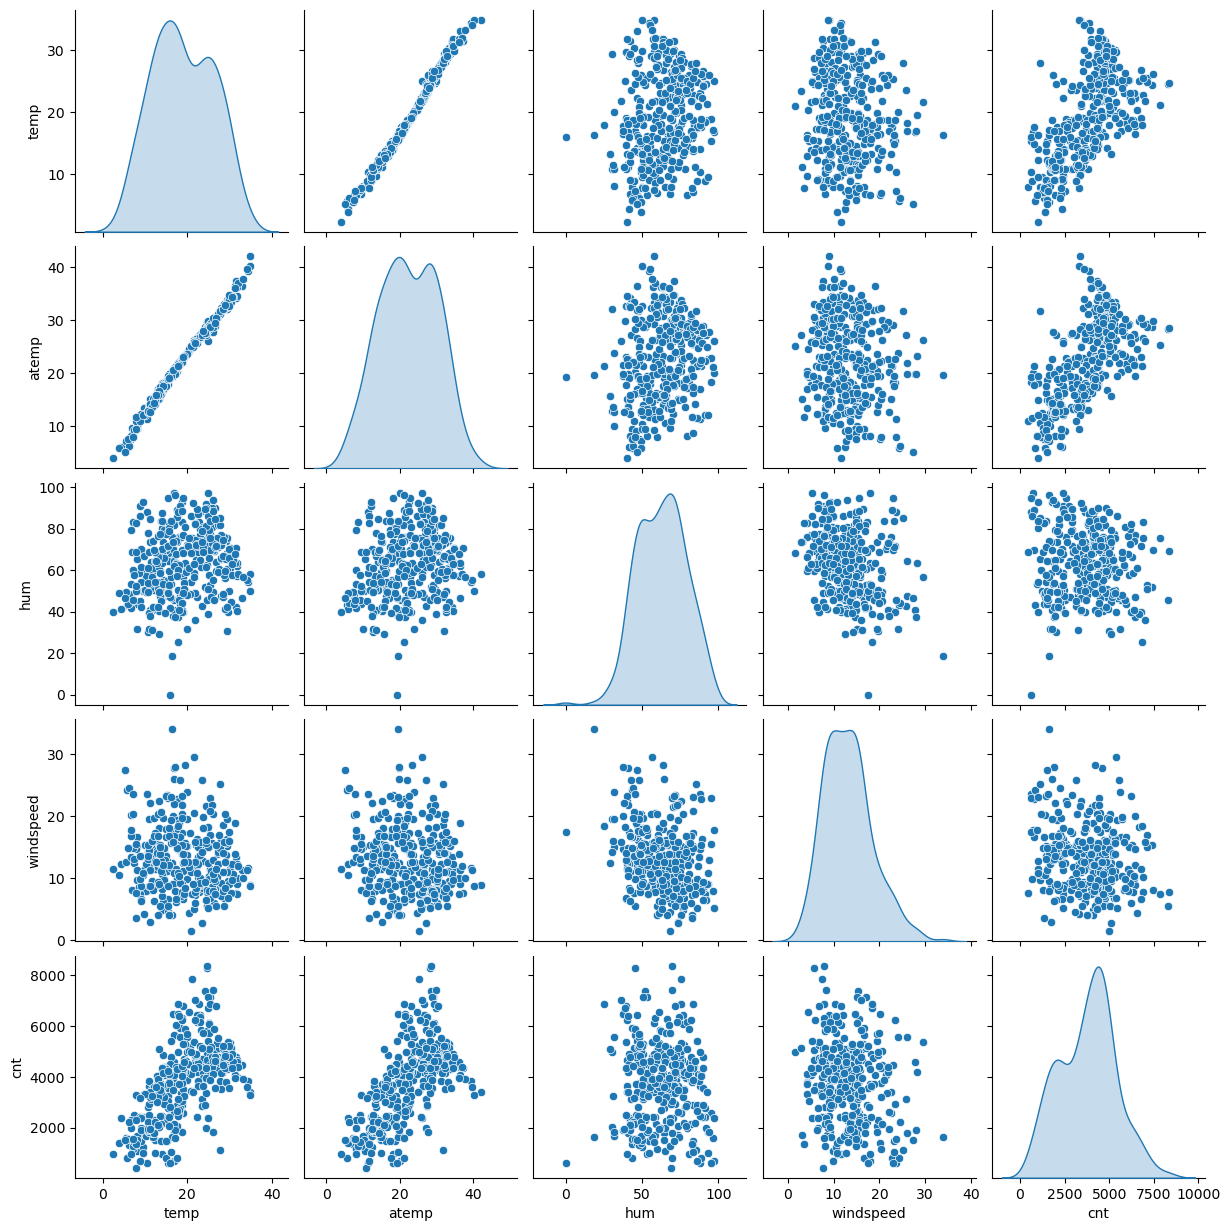

In [1168]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

## Visualising Catagorical Variables

In [1171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 183 to 492
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            357 non-null    int64  
 1   holiday       357 non-null    int64  
 2   workingday    357 non-null    int64  
 3   temp          357 non-null    float64
 4   atemp         357 non-null    float64
 5   hum           357 non-null    float64
 6   windspeed     357 non-null    float64
 7   cnt           357 non-null    int64  
 8   season_2      357 non-null    uint8  
 9   season_3      357 non-null    uint8  
 10  season_4      357 non-null    uint8  
 11  mnth_2        357 non-null    uint8  
 12  mnth_3        357 non-null    uint8  
 13  mnth_4        357 non-null    uint8  
 14  mnth_5        357 non-null    uint8  
 15  mnth_6        357 non-null    uint8  
 16  mnth_7        357 non-null    uint8  
 17  mnth_8        357 non-null    uint8  
 18  mnth_9        357 non-null    uin

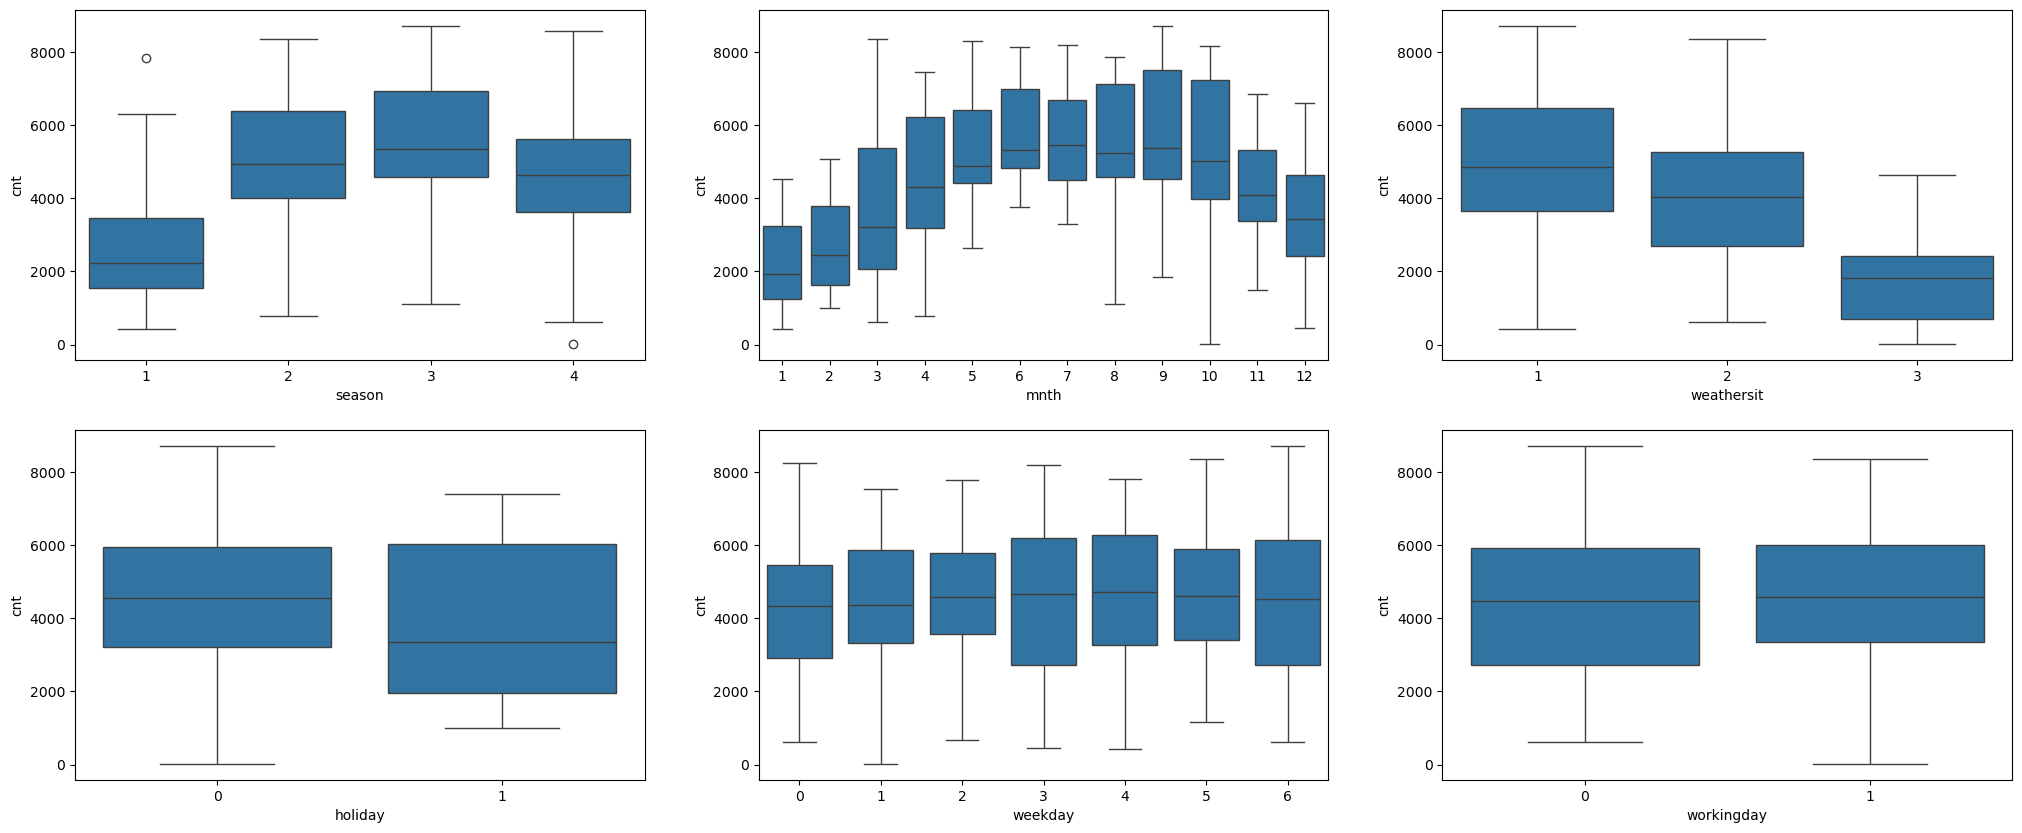

In [1172]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

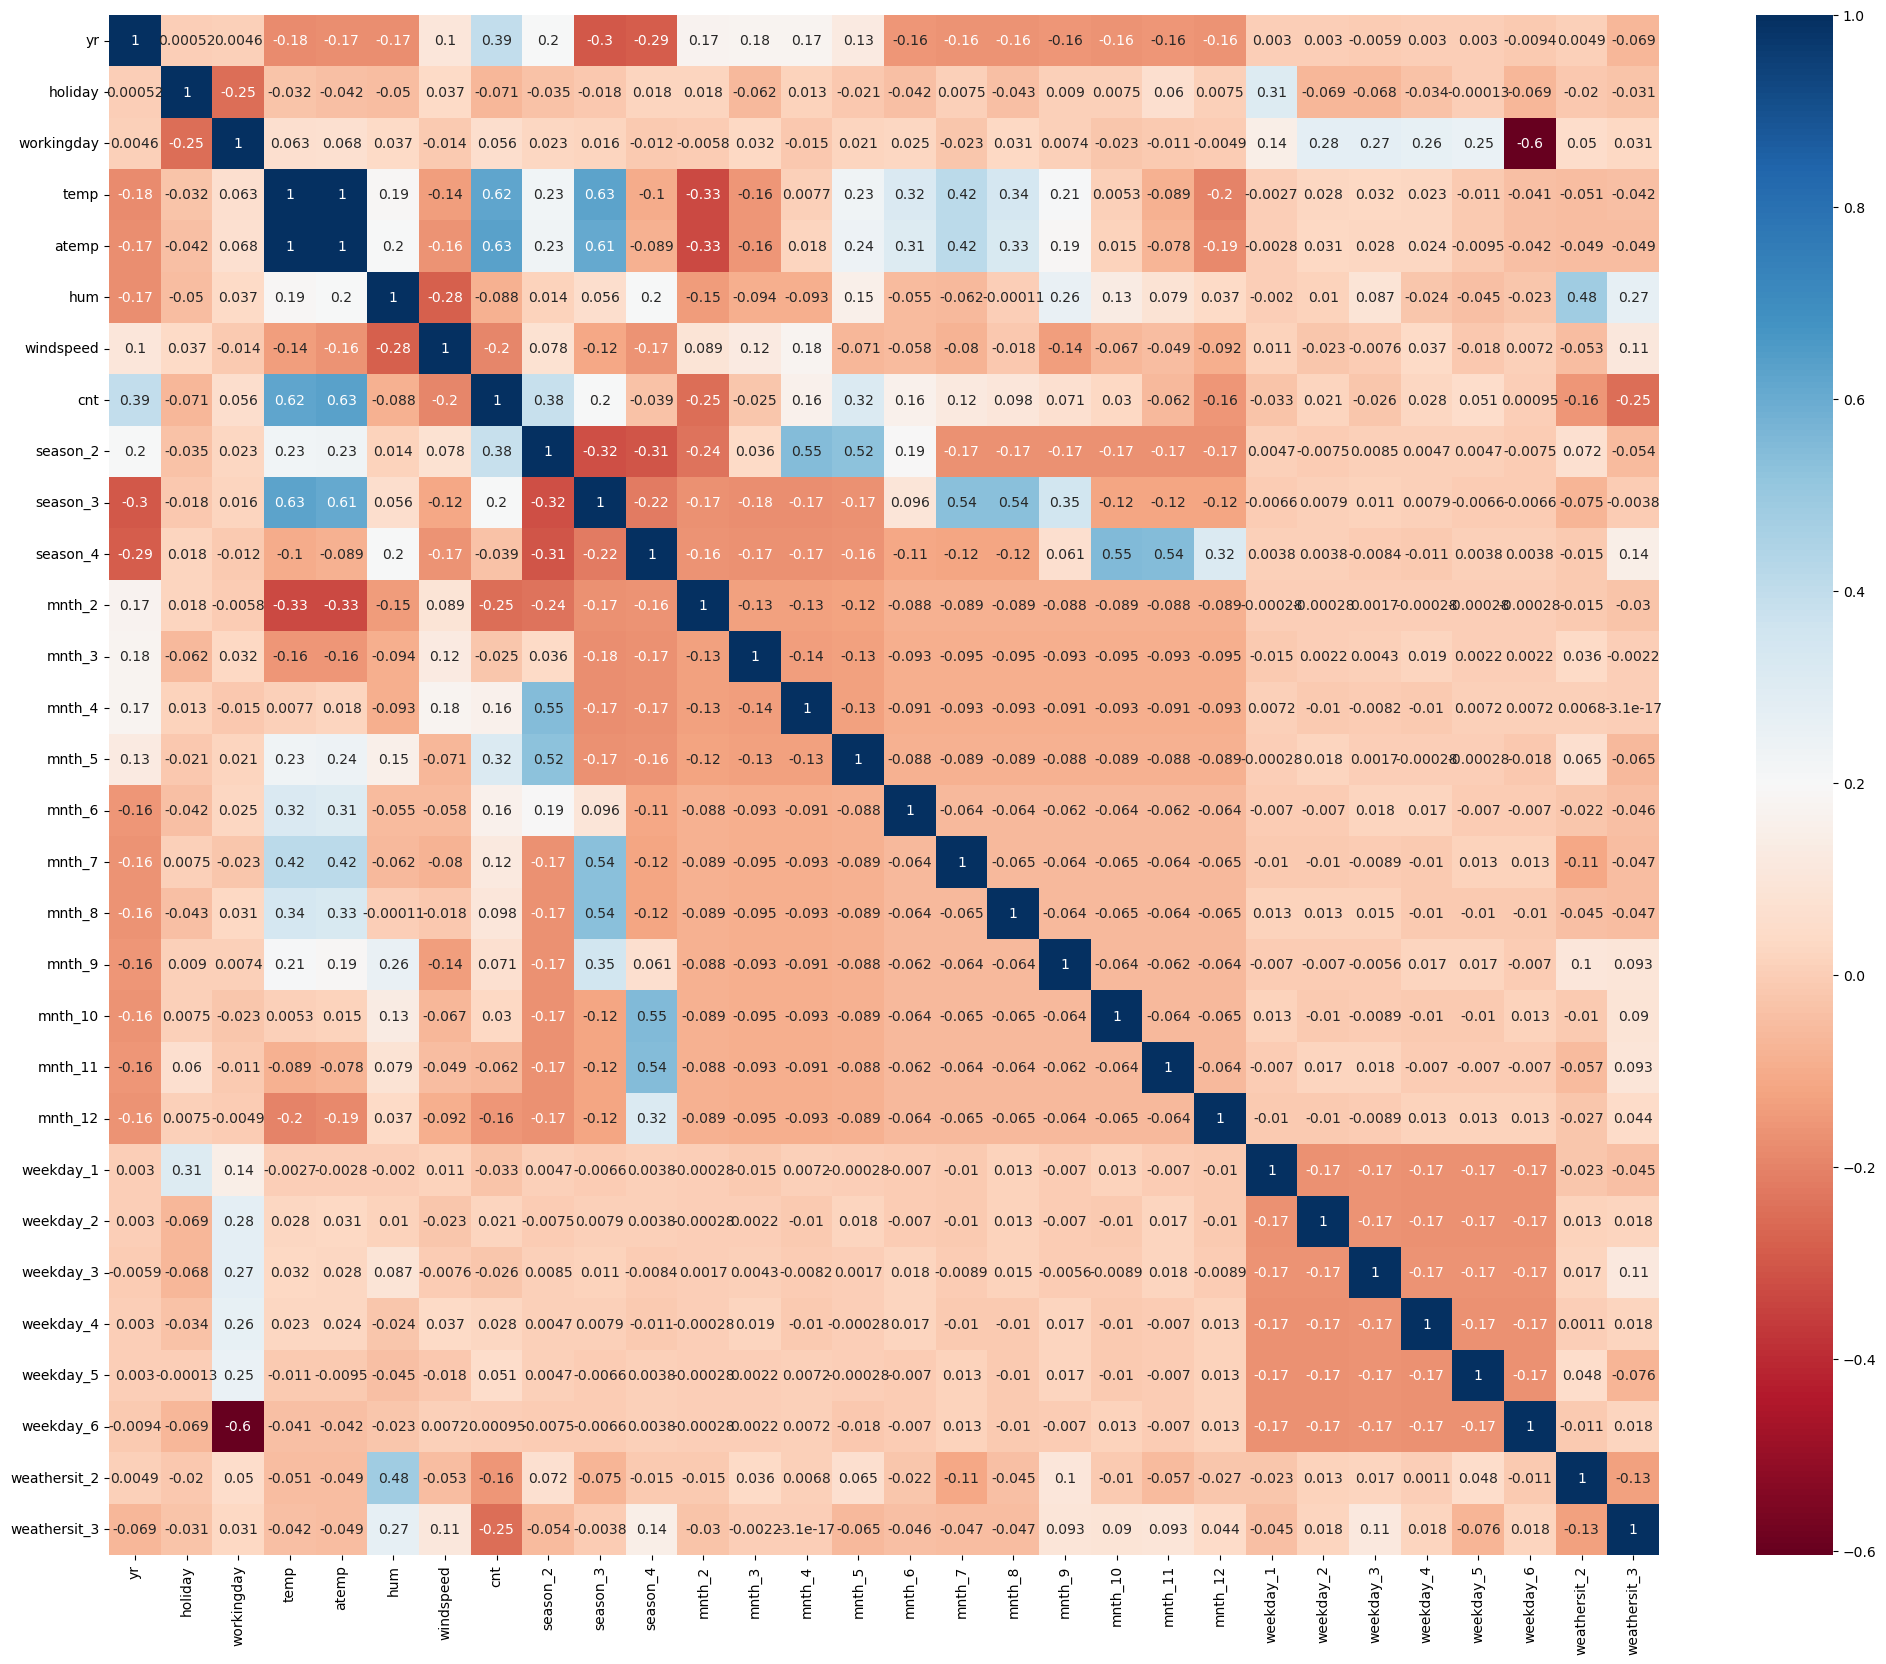

In [1175]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [1178]:
from sklearn.preprocessing import MinMaxScaler

In [1179]:
scaler = MinMaxScaler()

In [1180]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
183,0,0,0,29.383347,33.42875,68.2500,15.333486,4649,0,1,...,0,0,0,0,0,0,0,0,1,0
397,1,0,1,16.365847,19.94855,67.2917,12.541529,3761,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,1,14.008347,17.80250,76.9583,4.917519,4075,0,0,...,0,0,0,0,0,1,0,0,1,0
394,1,0,1,11.035847,13.13125,40.0833,14.458064,3624,0,0,...,0,0,1,0,0,0,0,0,0,0
194,0,0,1,27.914153,31.75520,47.6250,16.124689,5084,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1181]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [1182]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1183]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
183,0,0,0,0.832286,0.773805,0.701799,0.425641,0.531837,0,1,...,0,0,0,0,0,0,0,0,1,0
397,1,0,1,0.430406,0.419914,0.691946,0.339734,0.419871,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,1,0.357625,0.363574,0.791345,0.105148,0.459463,0,0,...,0,0,0,0,0,1,0,0,1,0
394,1,0,1,0.265857,0.240941,0.412168,0.398705,0.402597,0,0,...,0,0,1,0,0,0,0,0,0,0
194,0,0,1,0.786929,0.729870,0.489717,0.449986,0.586685,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1184]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.291317,0.014006,0.691877,0.512355,0.483389,0.645444,0.358618,0.422736,0.324930,0.176471,...,0.061625,0.056022,0.137255,0.142857,0.156863,0.145658,0.123249,0.145658,0.355742,0.033613
std,0.455007,0.117679,0.462366,0.223338,0.207202,0.163654,0.163939,0.199158,0.469006,0.381755,...,0.240810,0.230288,0.344599,0.350418,0.364182,0.353258,0.329185,0.353258,0.479410,0.180485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338638,0.322138,0.514139,0.235894,0.255201,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.496859,0.480414,0.652100,0.341014,0.446728,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.696217,0.650319,0.760925,0.442323,0.547472,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [1187]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [1189]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1190]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)  # Correct usage
rfe = rfe.fit(X_train, y_train)

In [1191]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 8),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', False, 15),
 ('mnth_7', False, 2),
 ('mnth_8', False, 4),
 ('mnth_9', False, 11),
 ('mnth_10', False, 9),
 ('mnth_11', False, 12),
 ('mnth_12', False, 10),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 13),
 ('weathersit_2', False, 5),
 ('weathersit_3', True, 1)]

In [1192]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [1193]:
X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [1194]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1195]:
print(X_train_rfe.dtypes)

yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2          uint8
season_4          uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weathersit_3      uint8
dtype: object


# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [1199]:
import statsmodels.api as sm

In [1200]:
X_train_sm=sm.add_constant(X_train_rfe)#X_train_sm["const"]=1


In [1201]:
#import statsmodels.api as sm

# Add a constant
#X_train_lm1 = sm.add_constant(X_train_sm)
#sm.OLS(np.array(y_train),X_train_sm)
#model1=sm.OLS(np.array(y_train),X_train_lm1)# Ordinary Least Squares

In [1202]:
# Create a first fitted model
model1 = sm.OLS(y_train, X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     97.42
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          4.69e-110
Time:                        19:29:25   Log-Likelihood:                 356.86
No. Observations:                 357   AIC:                            -683.7
Df Residuals:                     342   BIC:                            -625.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2091      0.031      6.838      0.000       0.149       0.269
yr               0.2320      0.012     19.655      0.000       0.209       0.255
holiday         -0.1065      0.037     -2.877      0.004      -0.179      -0.034
workingday       0.0197      0.010      1.933      0.054      -0.000       0.040
temp             0.5063      0.277      1.828      0.068      -0.039       1.051
atemp            0.1274      0.299      0.425      0.671      -0.462       0.716
hum             -0.2427      0.033     -7.253      0.000      -0.309      -0.177
windspeed       -0.1926      0.033     -5.843      0.000      -0.257      -0.128
season_2         0.0908      0.012      7.858      0.000       0.068       0.113
season_4         0.1590      0.015     10.851      0.000       0.130       0.188
weekday_1       -0.0253      0.012     -2.027      0.043      -0.050      -0.001
weekday_2       -0.0175      0.014     -1.277      0.202      -0.044       0.009
weekday_3       -0.0289      0.013     -2.186      0.029      -0.055      -0.003
weekday_4       -0.0070      0.013     -0.529      0.597      -0.033       0.019
weekday_5       -0.0082      0.014     -0.570      0.569      -0.036       0.020
weathersit_3    -0.2129      0.029     -7.438      0.000      -0.269      -0.157
==============================================================================
Omnibus:                       34.603   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.207
Skew:                          -0.542   Prob(JB):                     9.38e-16
Kurtosis:                       4.865   Cond. No.                     7.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1203]:
correlation_matrix = X_train_sm.corr()
print(correlation_matrix)

              const        yr   holiday  workingday      temp     atemp  \
const           NaN       NaN       NaN         NaN       NaN       NaN   
yr              NaN  1.000000  0.080969    0.013950 -0.178024 -0.168946   
holiday         NaN  0.080969  1.000000   -0.178594 -0.085544 -0.091470   
workingday      NaN  0.013950 -0.178594    1.000000  0.089345  0.094109   
temp            NaN -0.178024 -0.085544    0.089345  1.000000  0.996396   
atemp           NaN -0.168946 -0.091470    0.094109  0.996396  1.000000   
hum             NaN -0.145146 -0.066581   -0.010167  0.191915  0.202137   
windspeed       NaN  0.082483  0.005397   -0.010837 -0.115823 -0.138618   
season_2        NaN  0.200173 -0.082686    0.035522  0.230745  0.238957   
season_4        NaN -0.302497  0.067305   -0.015280 -0.103636 -0.089672   
weekday_1       NaN  0.030912  0.229538    0.195657 -0.029749 -0.027654   
weekday_2       NaN  0.055369 -0.048656    0.272441 -0.005168  0.002270   
weekday_3       NaN -0.03

In [1204]:
X_train_sm = X_train_rfe.drop('holiday', axis=1)

In [1205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data


,Feature,VIF
0,yr,1.675625
1,workingday,54.958452
2,temp,1025.257029
3,atemp,1055.121663
4,hum,9.708017
5,windspeed,4.395563
6,season_2,1.860491
7,season_4,1.670998
8,weekday_1,10.575217
9,weekday_2,12.741163


## Model 2

- Removing the variable 'atemp'' based on its High p-value & High VIF

In [1208]:
X_train_new = X_train_sm.drop(["atemp"], axis = 1)

### VIF Check

In [1210]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,54.45
9,weekday_3,13.72
8,weekday_2,12.70
10,weekday_4,12.43
11,weekday_5,11.07
7,weekday_1,10.52
3,hum,9.38
2,temp,6.80
4,windspeed,4.17
5,season_2,1.81


In [1211]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1212]:
# Check the parameters obtained

lr2.params

const           0.210575
yr              0.232709
workingday      0.128002
temp            0.623654
hum            -0.242205
windspeed      -0.196097
season_2        0.091585
season_4        0.160298
weekday_1      -0.133186
weekday_2      -0.125326
weekday_3      -0.137140
weekday_4      -0.115123
weekday_5      -0.116596
weathersit_3   -0.213601
dtype: float64

In [1213]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          4.90e-111
Time:                        19:29:25   Log-Likelihood:                 356.77
No. Observations:                 357   AIC:                            -685.5
Df Residuals:                     343   BIC:                            -631.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2106      0.030      6.943   

## Model 3

 - Removing the variable '"weekday_4","weekday_5"' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [1216]:
X_train_new = X_train_new.drop(["weekday_4","weekday_5"], axis = 1)

### VIF Check

In [1218]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.37
2,temp,6.78
1,workingday,4.46
4,windspeed,4.15
5,season_2,1.80
0,yr,1.60
9,weekday_3,1.59
6,season_4,1.57
8,weekday_2,1.53
7,weekday_1,1.43


In [1219]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [1220]:
lr3.params

const           0.201938
yr              0.229628
workingday      0.021076
temp            0.623730
hum            -0.235803
windspeed      -0.194971
season_2        0.093768
season_4        0.157370
weekday_1      -0.030141
weekday_2      -0.013349
weekday_3      -0.025867
weathersit_3   -0.212740
dtype: float64

In [1221]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.16e-111
Time:                        19:29:25   Log-Likelihood:                 353.24
No. Observations:                 357   AIC:                            -682.5
Df Residuals:                     345   BIC:                            -635.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2019      0.030      6.652   

## Model 4

- Removing the variable 'weekday_2' based on its Very High 'VIF' value.
- Even though the VIF of season3 is second highest, we decided to drop 'weekday_2' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [1224]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

### VIF Check

In [1226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.36
2,temp,6.78
4,windspeed,4.14
1,workingday,3.64
5,season_2,1.80
0,yr,1.59
6,season_4,1.57
8,weekday_3,1.39
7,weekday_1,1.29
9,weathersit_3,1.12


In [1227]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1228]:
# Check the parameters obtained

lr4.params

const           0.201769
yr              0.229029
workingday      0.016670
temp            0.624155
hum            -0.235986
windspeed      -0.194118
season_2        0.093536
season_4        0.156717
weekday_1      -0.025930
weekday_3      -0.021309
weathersit_3   -0.213306
dtype: float64

In [1229]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     134.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.39e-112
Time:                        19:29:25   Log-Likelihood:                 352.87
No. Observations:                 357   AIC:                            -683.7
Df Residuals:                     346   BIC:                            -641.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2018      0.030      6.649   

## Model 5

- Removing the variable 'workingday' based on its Very High p-value.

In [1232]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### VIF Check

In [1234]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,9.08
1,temp,6.59
3,windspeed,4.04
4,season_2,1.80
0,yr,1.58
5,season_4,1.57
7,weekday_3,1.24
6,weekday_1,1.19
8,weathersit_3,1.12


In [1235]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [1236]:
# Check the parameters obtained

lr5.params

const           0.211682
yr              0.229576
temp            0.627166
hum            -0.238612
windspeed      -0.195024
season_2        0.093555
season_4        0.156912
weekday_1      -0.020244
weekday_3      -0.014366
weathersit_3   -0.212519
dtype: float64

In [1237]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     148.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.20e-113
Time:                        19:29:26   Log-Likelihood:                 351.77
No. Observations:                 357   AIC:                            -683.5
Df Residuals:                     347   BIC:                            -644.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2117      0.030      7.145   

## Model 6

- Removing the variable 'hum' based on its High 'p-value'.

In [1240]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [1242]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.63
2,windspeed,3.51
3,season_2,1.80
0,yr,1.49
4,season_4,1.34
6,weekday_3,1.23
5,weekday_1,1.18
7,weathersit_3,1.10


In [1243]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [1244]:
# Check the parameters obtained

lr6.params

const           0.052264
yr              0.233413
temp            0.601012
windspeed      -0.126122
season_2        0.087637
season_4        0.142639
weekday_1      -0.021892
weekday_3      -0.017597
weathersit_3   -0.265027
dtype: float64

In [1245]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     140.5
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          4.14e-104
Time:                        19:29:26   Log-Likelihood:                 327.47
No. Observations:                 357   AIC:                            -636.9
Df Residuals:                     348   BIC:                            -602.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0523      0.021      2.523   

## Model 7

In [1247]:
X_train_new = X_train_new.drop(["weekday_1","weekday_3"], axis = 1)

In [1248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.50
2,windspeed,3.45
3,season_2,1.80
0,yr,1.49
4,season_4,1.34
5,weathersit_3,1.09


In [1249]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm6).fit()

In [1250]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     186.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          9.84e-106
Time:                        19:29:26   Log-Likelihood:                 325.93
No. Observations:                 357   AIC:                            -637.9
Df Residuals:                     350   BIC:                            -610.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0474      0.021      2.305   

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 233.8
- Prob (F-statistic): 3.77e-181

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

cnt = 0.084143 + (**yr** × 0.258) + (**temp** × 0.649) − (**windspeed** × 0.062) + (**season2** × 0.111) + (**season4** ×0.172)  − (**weathersit3** × 0.209)

## Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.649’ indicated that a unit increase in temp variable, increases the bike hire numbers by0.649 units.

**weathersit3:** A coefficient value of ‘-0.209’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.209 units.

**yr:** A coefficient value of ‘0.258’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.258 units.

**season4:** A coefficient value of ‘0.172’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.172 units.

**windspeed:** A coefficient value of ‘-0.062’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.062 units.


**season2:** A coefficient value of ‘0.111’ indicated that w.r.t season_1, a unit increase in season_2 variable increase the bike hire numbers by 0.111 units.

**const:** The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [1259]:
y_train_pred = lr7.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

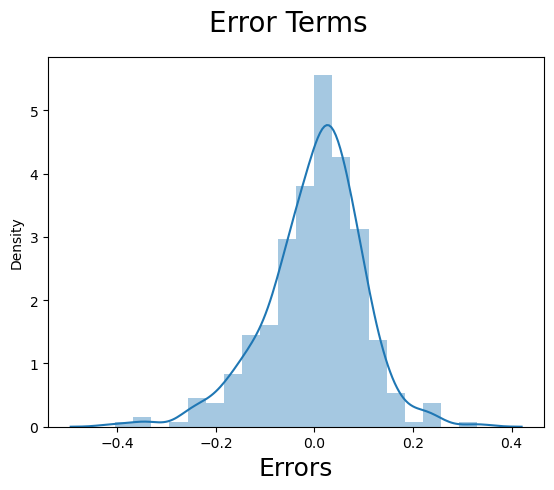

In [1260]:
res = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

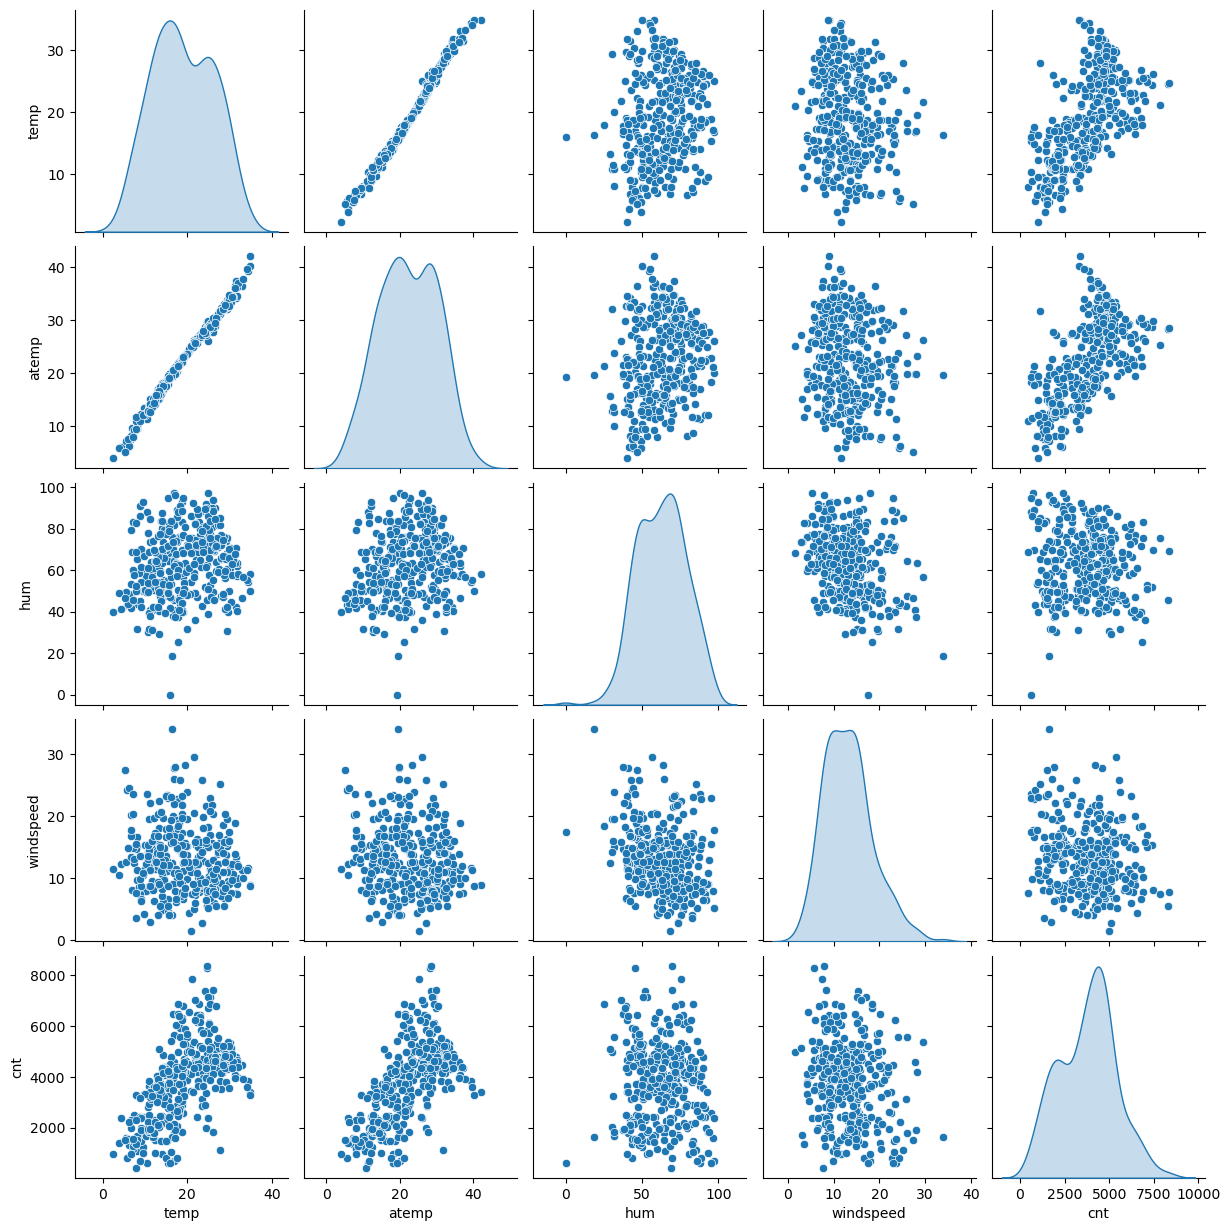

In [1263]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [1266]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.50
2,windspeed,3.45
3,season_2,1.80
0,yr,1.49
4,season_4,1.34
5,weathersit_3,1.09


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [1269]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1270]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
454,1,0,0,0.462050,0.449759,0.759211,0.470498,0.731812,1,0,...,0,0,0,0,0,0,0,1,1,0
196,0,0,0,0.794313,0.734017,0.601542,0.383346,0.692473,0,1,...,0,0,0,0,0,0,0,1,0,0
176,0,0,0,0.785874,0.733185,0.527849,0.148724,0.614550,0,1,...,0,0,0,0,0,0,0,0,0,0
452,1,0,1,0.550654,0.529300,0.451586,0.612814,0.718951,1,0,...,0,0,0,0,0,1,0,0,0,0
16,0,1,0,0.147718,0.128246,0.552699,0.353815,0.071744,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1271]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.267974,0.058824,0.673203,0.522242,0.491914,0.642717,0.358725,0.428761,0.274510,0.202614,...,0.052288,0.071895,0.156863,0.143791,0.104575,0.137255,0.189542,0.137255,0.307190,0.032680
std,0.444358,0.236067,0.470583,0.233793,0.218208,0.139692,0.157618,0.202244,0.447733,0.403268,...,0.223337,0.259163,0.364866,0.352030,0.307010,0.345246,0.393226,0.345246,0.462844,0.178381
min,0.000000,0.000000,0.000000,0.047329,0.025950,0.283633,0.047441,0.009457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.308049,0.283586,0.538132,0.248700,0.287353,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.528503,0.513565,0.638389,0.347424,0.451267,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.728915,0.677682,0.759211,0.448741,0.559198,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.956753,0.980934,0.944301,0.823075,0.908839,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [1273]:
y_test = df_test.pop('cnt')
X_test = df_test


In [1274]:
print(y_test)

454    0.731812
196    0.692473
176    0.614550
452    0.718951
16     0.071744
         ...   
318    0.474593
41     0.165805
470    0.748834
311    0.475854
205    0.429832
Name: cnt, Length: 153, dtype: float64


In [1275]:
print(X_test)

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
454   1        0           0  0.462050  0.449759  0.759211   0.470498   
196   0        0           0  0.794313  0.734017  0.601542   0.383346   
176   0        0           0  0.785874  0.733185  0.527849   0.148724   
452   1        0           1  0.550654  0.529300  0.451586   0.612814   
16    0        1           0  0.147718  0.128246  0.552699   0.353815   
..   ..      ...         ...       ...       ...       ...        ...   
318   0        0           1  0.596010  0.562476  0.708226   0.365392   
41    0        0           1  0.164499  0.176470  0.520683   0.177620   
470   1        1           0  0.765834  0.703383  0.577550   0.541028   
311   0        0           1  0.442008  0.437339  0.742074   0.096163   
205   0        0           1  0.866039  0.842565  0.778492   0.141044   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
454         1         0         0  ...        0     

In [1276]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
print(X_test)

     yr      temp  windspeed  season_2  season_4  weathersit_3
454   1  0.462050   0.470498         1         0             0
196   0  0.794313   0.383346         0         0             0
176   0  0.785874   0.148724         0         0             0
452   1  0.550654   0.612814         1         0             0
16    0  0.147718   0.353815         0         0             0
..   ..       ...        ...       ...       ...           ...
318   0  0.596010   0.365392         0         1             0
41    0  0.164499   0.177620         0         0             0
470   1  0.765834   0.541028         1         0             0
311   0  0.442008   0.096163         0         1             0
205   0  0.866039   0.141044         0         0             0

[153 rows x 6 columns]


In [1277]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 454 to 205
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         153 non-null    float64
 1   yr            153 non-null    int64  
 2   temp          153 non-null    float64
 3   windspeed     153 non-null    float64
 4   season_2      153 non-null    uint8  
 5   season_4      153 non-null    uint8  
 6   weathersit_3  153 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 6.4 KB


In [1278]:
y_pred = lr7.predict(X_test_lm6)

# MODEL EVALUATION

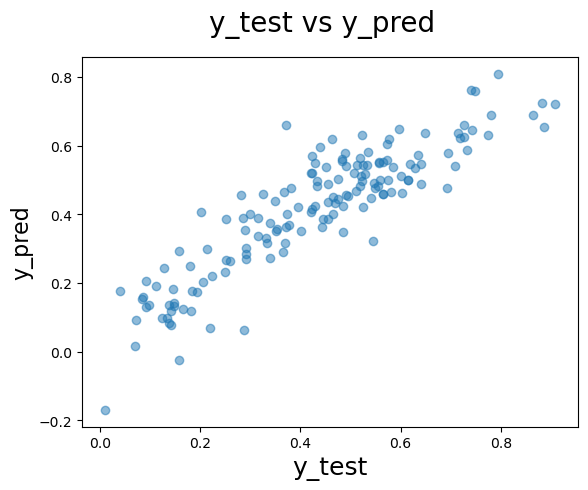

In [1280]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [1282]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7914713796315745

## Adjusted R^2 Value for TEST

In [1284]:
# We already have the value of R^2 (calculated in above step)

r2= 0.7914713796315745

In [1285]:
# Get the shape of X_test
X_test.shape


(153, 6)

In [1286]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7829017103013652

# Final Result Comparison

- Train R^2 : 0.7627
- Train Adjusted R^2   0.7571 
- Test R^2 :0.7914
- Test Adjusted R^2 :0.782 
- This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.649’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.649 units. 
- **Weather Situation 3 (weathersit3)** - A coefficient value of ‘-0.209’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.172’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.062’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_3 
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season2 & season4 
 - **season1:** summer 
 - **season4:** winter